# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [294]:
#!pip install collection

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

In [2]:
import matplotlib.dates as mdates

In [3]:
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Load the Data

In [6]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
print(f"The shapes of the dataframes are: 'income'-{df_hh_income.shape}, \
'poverty pct'-{df_pct_poverty.shape}, \
'share of race by city'-{df_share_race_city.shape}, \
'completed pct'-{df_pct_completed_hs.shape} and \
'fatalities'-{df_fatalities.shape} rows and columns")

The shapes of the dataframes are: 'income'-(29322, 3), 'poverty pct'-(29329, 3), 'share of race by city'-(29268, 7), 'completed pct'-(29329, 3) and 'fatalities'-(2535, 14) rows and columns


In [9]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [10]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [11]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [12]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [13]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [14]:
print(f"The missing values of the dataframes are: \
'income'-{df_hh_income.isna().values.sum()}, \
'poverty pct'-{df_pct_poverty.isna().values.sum()}, \
'share of race by city'-{df_share_race_city.isna().values.sum()}, \
'completed pct'-{df_pct_completed_hs.isna().values.sum()} and \
'fatalities'-{df_fatalities.isna().values.sum()}")

The missing values of the dataframes are: 'income'-51, 'poverty pct'-0, 'share of race by city'-0, 'completed pct'-0 and 'fatalities'-346


In [15]:
print(f"The duplicate values of the dataframes are: \
'income'-{df_hh_income.duplicated().values.sum()}, \
'poverty pct'-{df_pct_poverty.duplicated().values.sum()}, \
'share of race by city'-{df_share_race_city.duplicated().values.sum()}, \
'completed pct'-{df_pct_completed_hs.duplicated().values.sum()} and \
'fatalities'-{df_fatalities.duplicated().values.sum()}")

The duplicate values of the dataframes are: 'income'-0, 'poverty pct'-0, 'share of race by city'-0, 'completed pct'-0 and 'fatalities'-0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [16]:
df_fatalities = df_fatalities.dropna()
df_fatalities.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [17]:
df_hh_income = df_hh_income.dropna()
df_hh_income.isna().sum()

Geographic Area    0
City               0
Median Income      0
dtype: int64

In [18]:
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"], errors='coerce')

/var/folders/pv/s_ss5l0d0llch1w8tscp8wz80000gn/T/ipykernel_89196/2413870865.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_fatalities["date"] = pd.to_datetime(df_fatalities["date"], errors='coerce')


In [19]:
df_fatalities["Year"] = df_fatalities.date.dt.year

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [20]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

In [21]:
poverty_rate = df_pct_poverty.groupby("Geographic Area").agg({"poverty_rate": pd.Series.mean})

In [22]:
poverty_rate.sort_values("poverty_rate",ascending=False, inplace=True)

In [23]:
bar = px.bar(poverty_rate,
             x=poverty_rate.index,
             y=poverty_rate.poverty_rate,
             color="poverty_rate",
             color_continuous_scale=px.colors.sequential.algae)

bar.update_layout(xaxis=dict(tickangle=45),
                  xaxis_title='Geographic Area', yaxis_title='Poverty Rate',
                  coloraxis_showscale=False)
bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [24]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

In [25]:
graduation_rate = df_pct_completed_hs.groupby("Geographic Area").agg({"percent_completed_hs": pd.Series.mean})

In [26]:
graduation_rate.sort_values("percent_completed_hs", ascending=True, inplace=True)

In [27]:
bar = px.bar(graduation_rate,
             x=graduation_rate.index,
             y=graduation_rate.percent_completed_hs,
             color="percent_completed_hs",
             color_continuous_scale=px.colors.sequential.Darkmint,
             title="High School Graduation Rate by State")

bar.update_layout(xaxis=dict(tickangle=45),
                  xaxis_title='Geographic Area', yaxis_title='Completed HS Percentage',
                  coloraxis_showscale=False)
bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


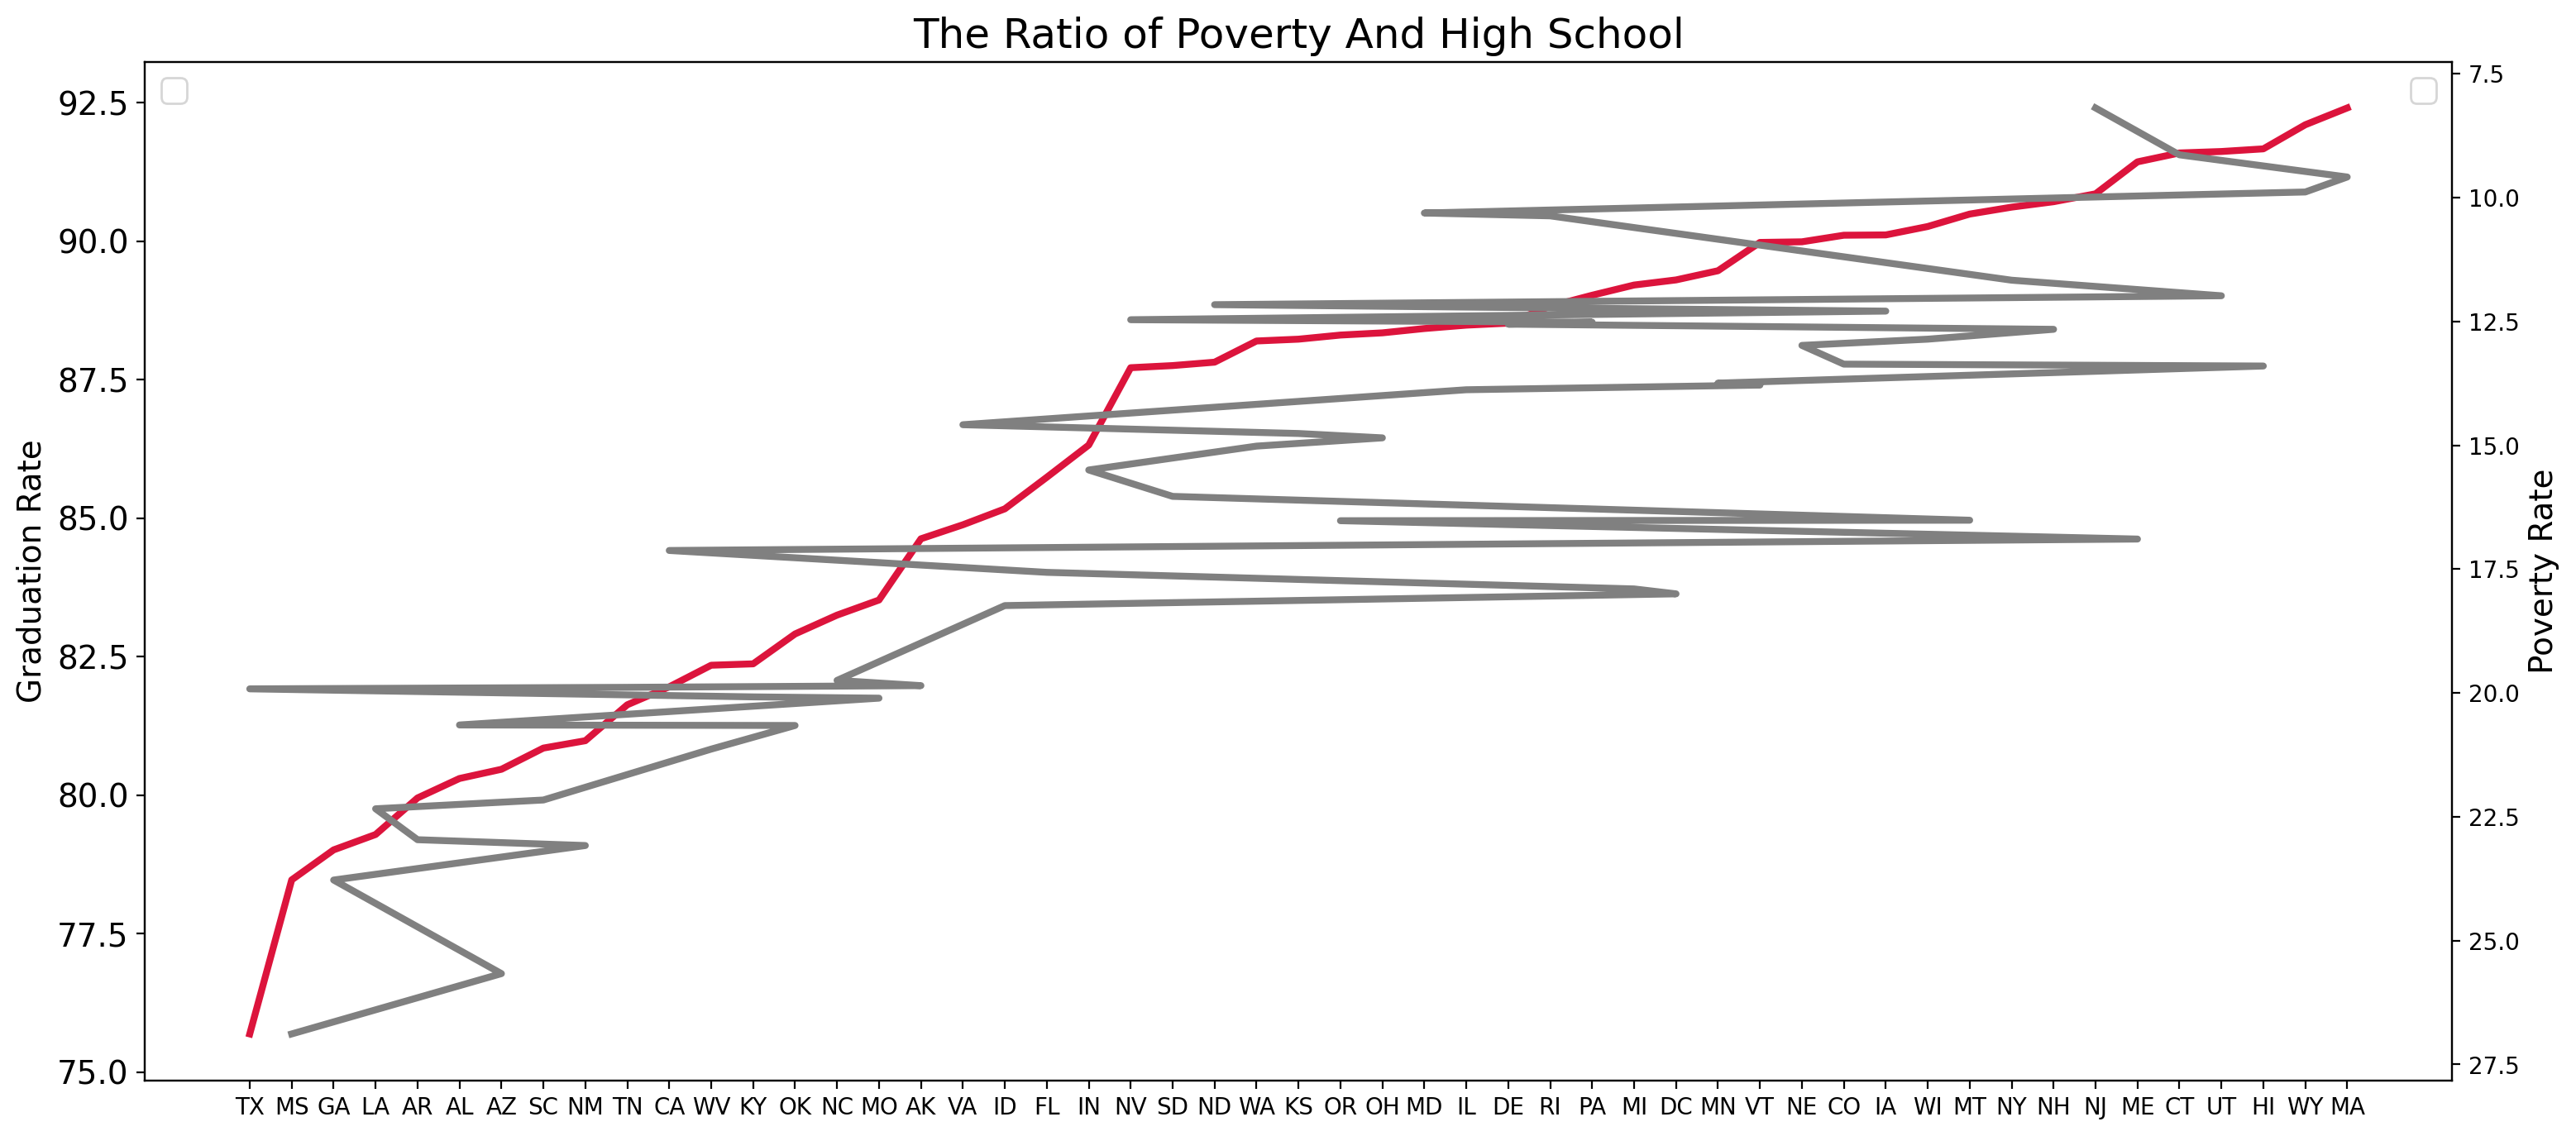

In [28]:
plt.figure(figsize=(18,8), dpi=200)
plt.style.use("tableau-colorblind10")
plt.title('The Ratio of Poverty And High School', fontsize=18)
plt.yticks(fontsize=14)

ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() # create second y-axis

ax2.invert_yaxis()

ax1.plot(graduation_rate.index,
         graduation_rate.values,
         color="crimson",
         linewidth=3)

ax2.plot(poverty_rate.index, 
         poverty_rate.values, 
         c='grey', 
         linewidth=3,)

ax1.legend(loc='upper left', fontsize=14)
ax2.legend(loc='upper right', fontsize=14)

# Labeling y-axes
ax1.set_ylabel('Graduation Rate', fontsize=14)
ax2.set_ylabel('Poverty Rate', fontsize=14)

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [29]:
poverty_rate.head()

poverty_rate
Geographic Area              
MS                      26.88
AZ                      25.67
GA                      23.78
NM                      23.08
AR                      22.96

In [30]:
graduation_rate.head()

percent_completed_hs
Geographic Area                      
TX                              75.69
MS                              78.47
GA                              79.01
LA                              79.29
AR                              79.95

In [31]:
merged_df = pd.merge(poverty_rate, graduation_rate, on="Geographic Area")

/Users/milan91/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/milan91/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 3200x1800 with 0 Axes>

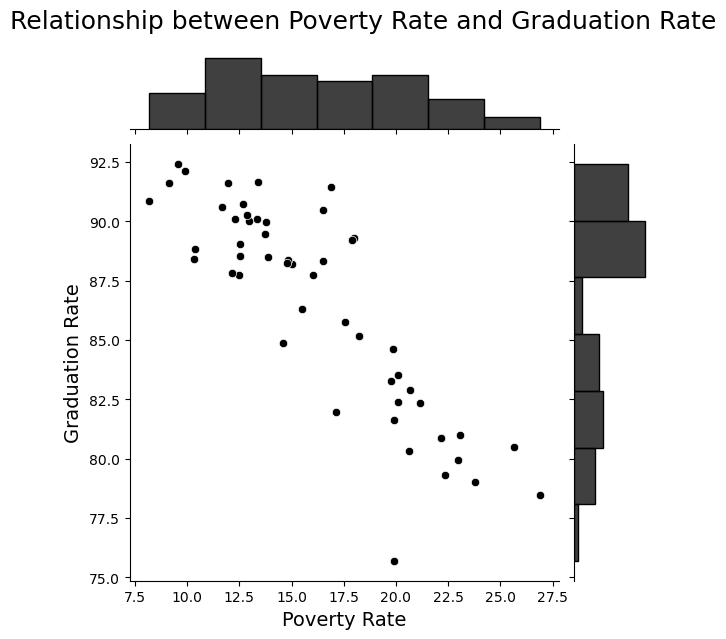

In [32]:
plt.figure(figsize=(16, 9), dpi=200)

joint = sns.jointplot(data=merged_df, 
                      x='poverty_rate', 
                      y='percent_completed_hs', 
                      kind='scatter',
                      color='black')

plt.xlabel('Poverty Rate', fontsize=14)
plt.ylabel('Graduation Rate', fontsize=14)

plt.suptitle('Relationship between Poverty Rate and Graduation Rate', fontsize=18, y=1.05)
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [33]:
from statsmodels import regression

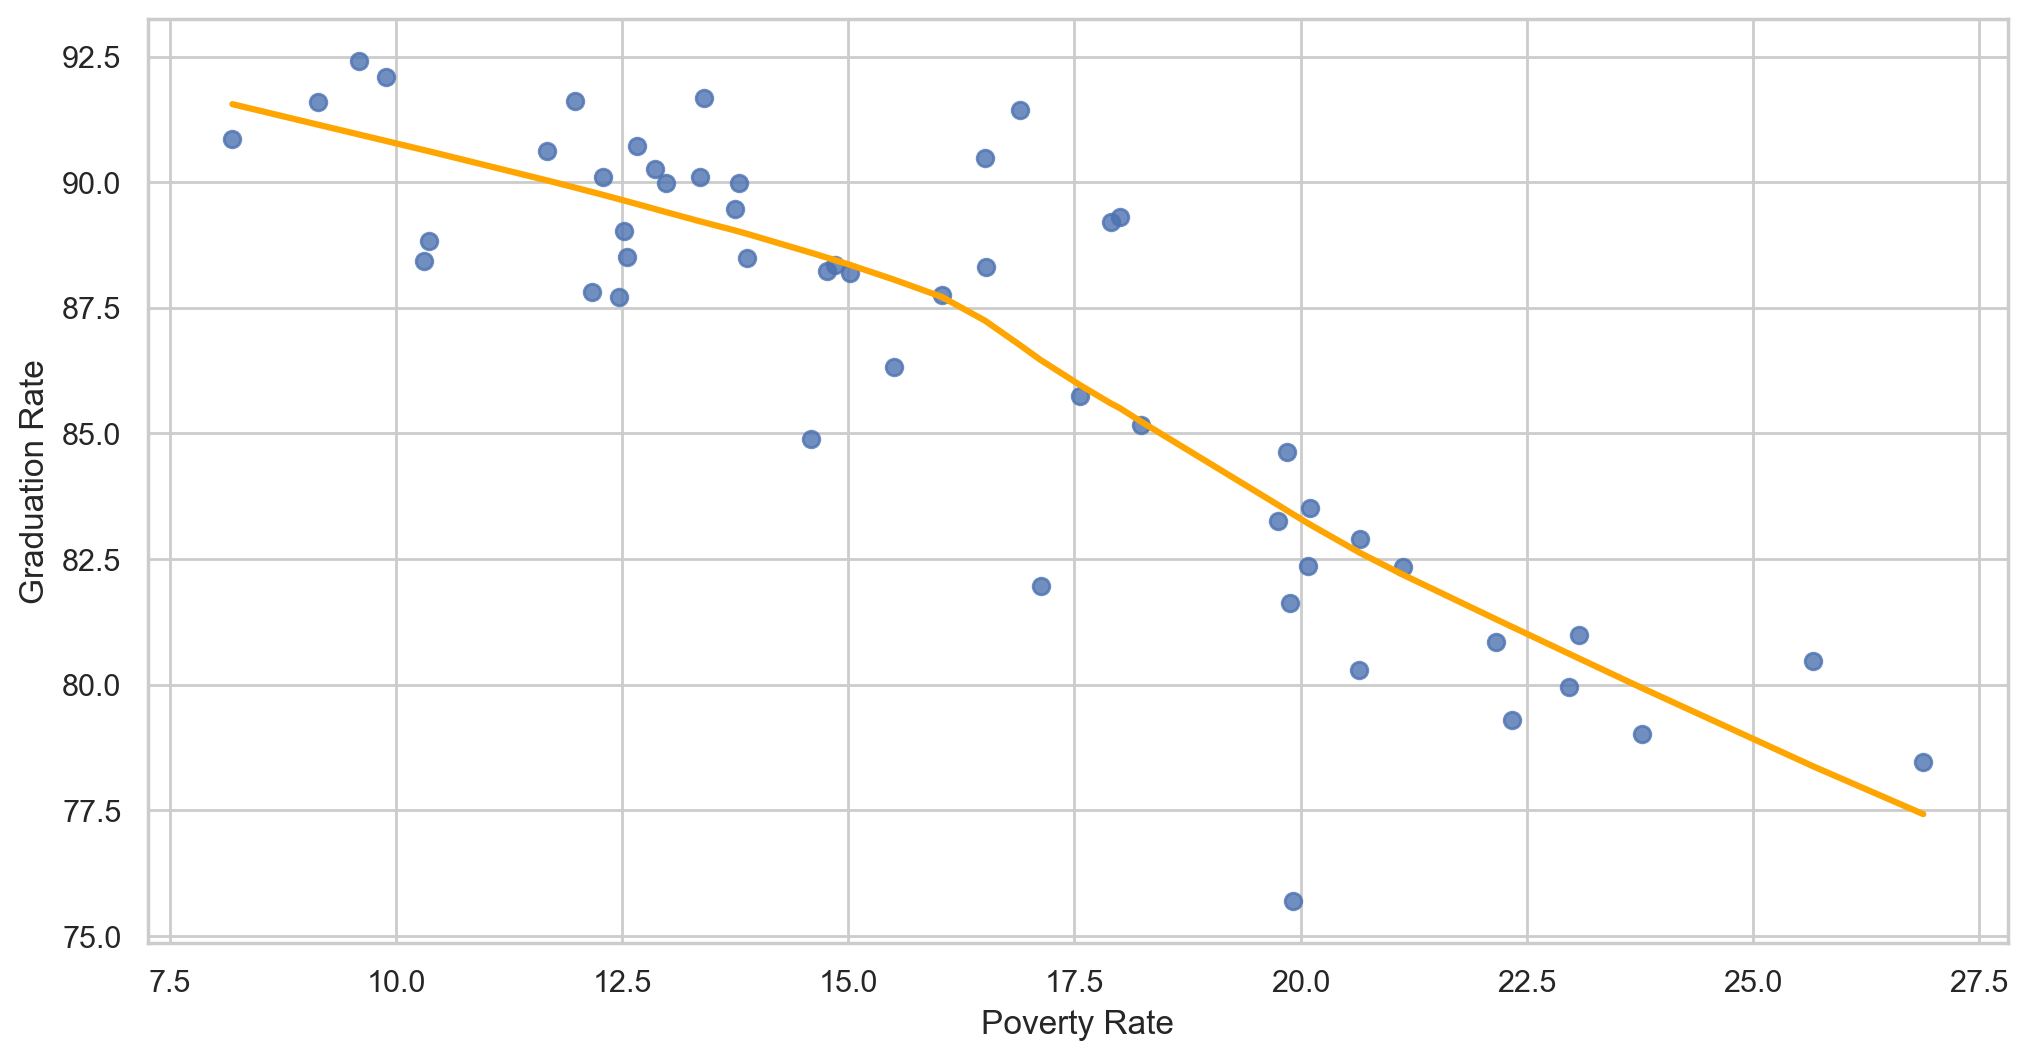

In [89]:
plt.figure(figsize=(12,6), dpi=200)

reg_plot = sns.regplot(merged_df,
                       x='poverty_rate', 
                       y='percent_completed_hs',
                       lowess=True, 
                       scatter_kws = {'alpha': 0.8},
                       line_kws={'color': 'orange'})

plt.xlabel("Poverty Rate")
plt.ylabel("Graduation Rate")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [35]:
df_share_race_city['share_white'] = pd.to_numeric(df_share_race_city['share_white'], errors='coerce')
df_share_race_city['share_black'] = pd.to_numeric(df_share_race_city['share_black'], errors='coerce')
df_share_race_city['share_native_american'] = pd.to_numeric(df_share_race_city['share_native_american'], errors='coerce')
df_share_race_city['share_asian'] = pd.to_numeric(df_share_race_city['share_asian'], errors='coerce')
df_share_race_city['share_hispanic'] = pd.to_numeric(df_share_race_city['share_hispanic'], errors='coerce')

In [36]:
grouped_data = df_share_race_city.groupby(["Geographic area"]).agg({
    "share_white": "mean",
    "share_black": "mean",
    "share_native_american": "mean",
    "share_asian": "mean",
    "share_hispanic": "mean"
}).reset_index()

In [37]:
melted_data = pd.melt(grouped_data, id_vars=["Geographic area"], var_name="Race", value_name="Share")

In [38]:
num_countries = len(grouped_data)
half_num_countries = num_countries // 2

In [39]:
countries_group1 = melted_data[melted_data["Geographic area"].isin(grouped_data["Geographic area"].iloc[:half_num_countries])]
countries_group2 = melted_data[melted_data["Geographic area"].isin(grouped_data["Geographic area"].iloc[half_num_countries:])]

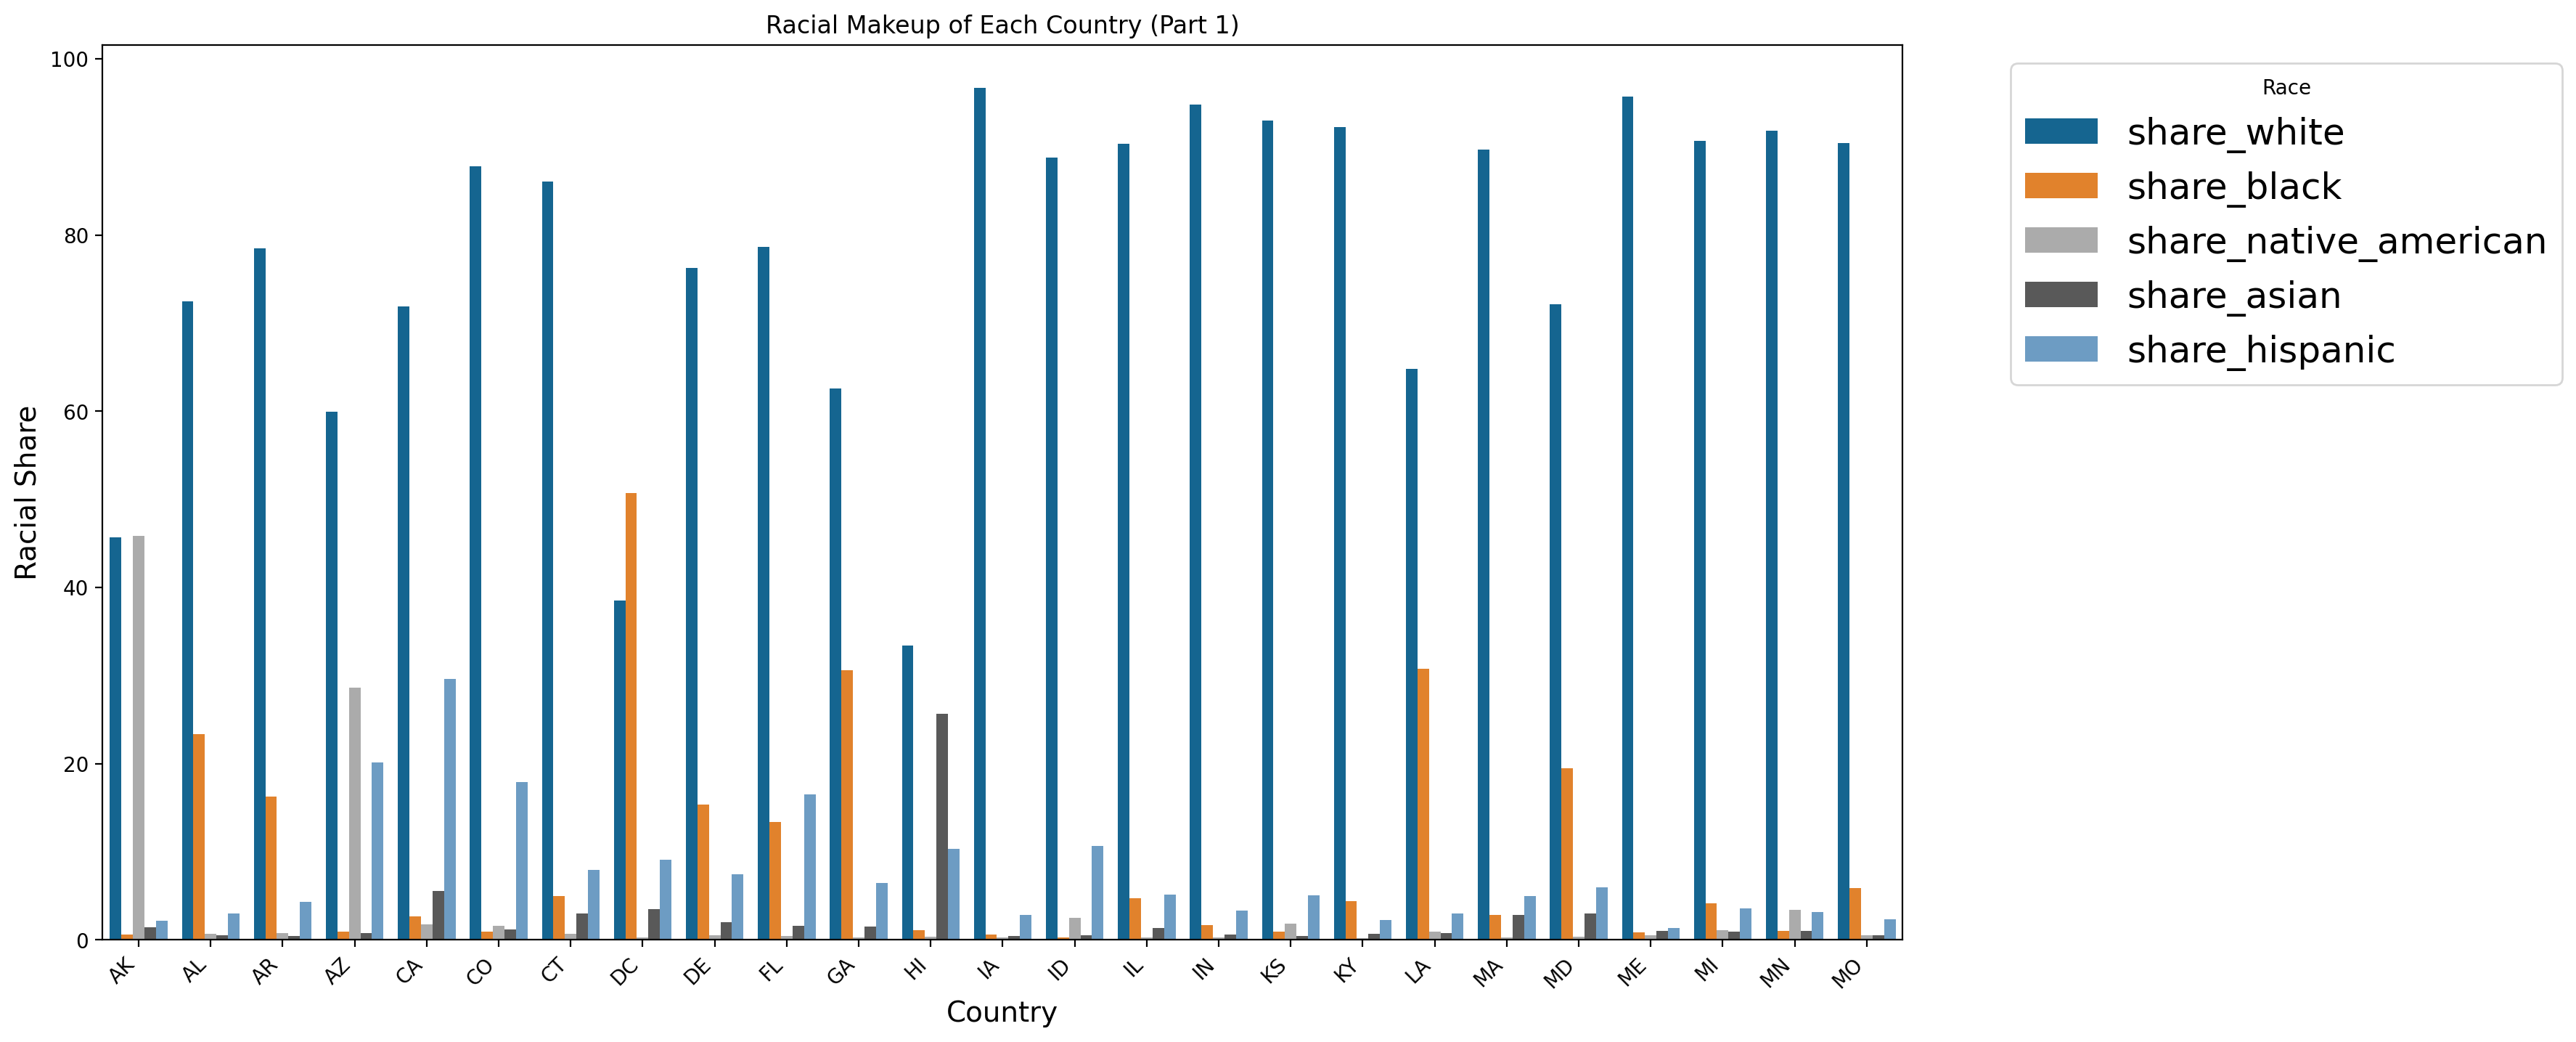

In [40]:
plt.figure(figsize=(16, 8), dpi=200)
sns.barplot(data=countries_group1, x="Geographic area", y="Share", hue="Race")
plt.title("Racial Makeup of Each Country (Part 1)")
plt.xlabel("Country", fontsize=14)
plt.ylabel("Racial Share", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)

plt.show()

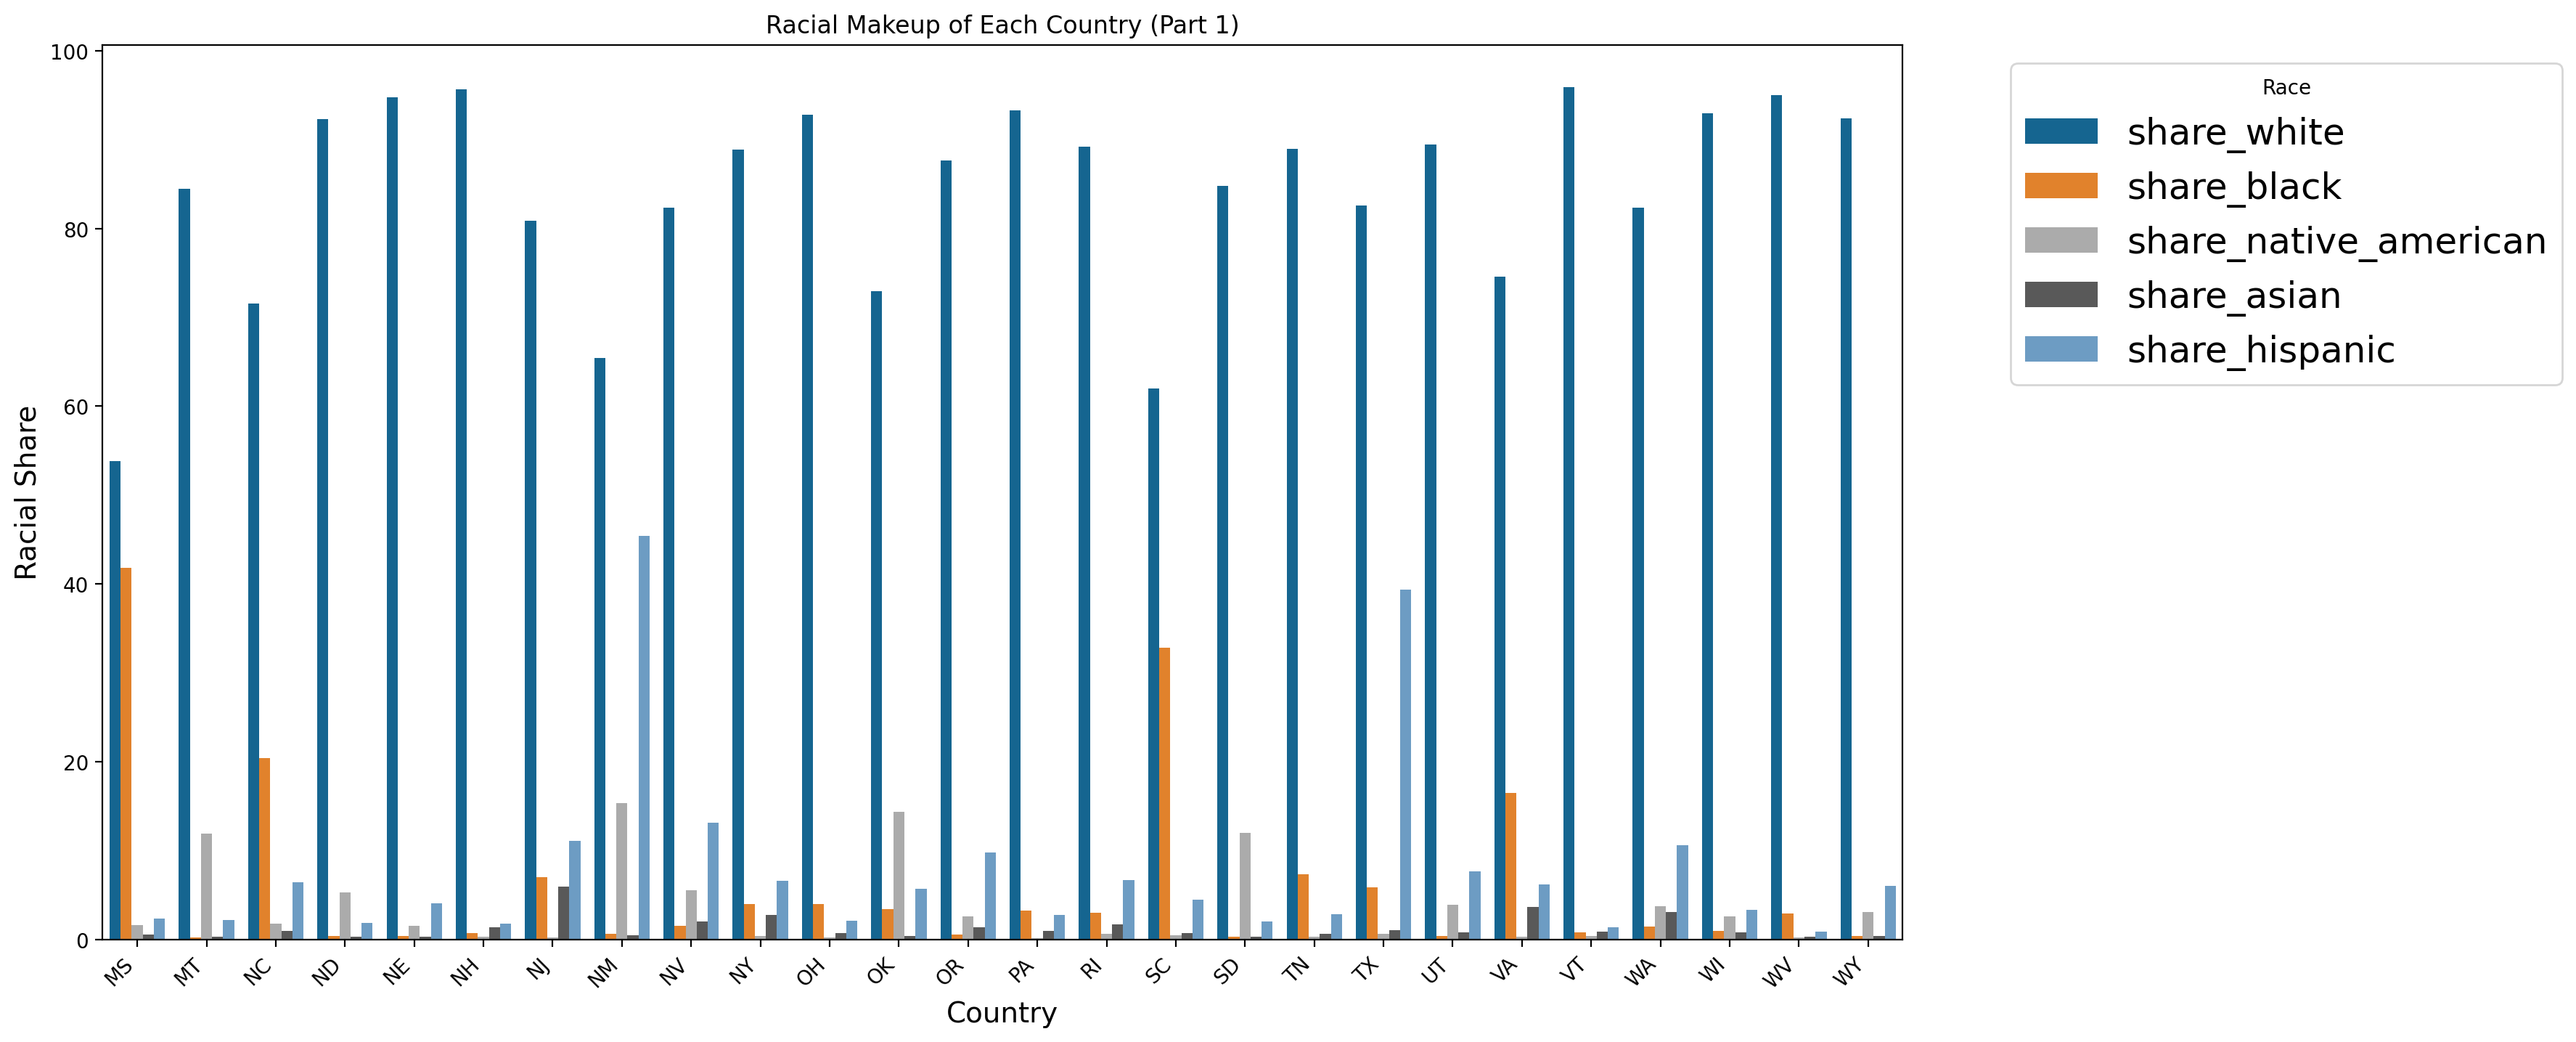

In [41]:
plt.figure(figsize=(16, 8), dpi=200)
sns.barplot(data=countries_group2, x="Geographic area", y="Share", hue="Race")
plt.title("Racial Makeup of Each Country (Part 1)")
plt.xlabel("Country", fontsize=14)
plt.ylabel("Racial Share", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)

plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [42]:
df_fatalities.head()

id                name       date   manner_of_death       armed   age  \
0   3          Tim Elliot 2015-02-01              shot         gun 53.00   
1   4    Lewis Lee Lembke 2015-02-01              shot         gun 47.00   
2   5  John Paul Quintero 2015-03-01  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman 2015-04-01              shot  toy weapon 32.00   
4   9   Michael Rodriguez 2015-04-01              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  Year  
0  Not fleeing        False  2015  
1  Not fleeing        False  2015  
2  Not fleeing        False  2015  
3  Not fleeing        False  2015  
4  Not fleeing        False  2015

In [43]:
df_fatalities["race"] = df_fatalities["race"].replace(["W", "B"], ["White", "Black"])

In [44]:
df_fatalities["race"] = df_fatalities["race"].replace(["A", "N"], ["Asian", "Native"])

In [45]:
df_fatalities["race"] = df_fatalities["race"].replace(["H", "O"], ["Hispanic", "Other"])

In [46]:
death_per_race = df_fatalities.race.value_counts()

In [47]:
death_per_race = death_per_race.to_frame()

In [48]:
death_per_race = death_per_race.reset_index()

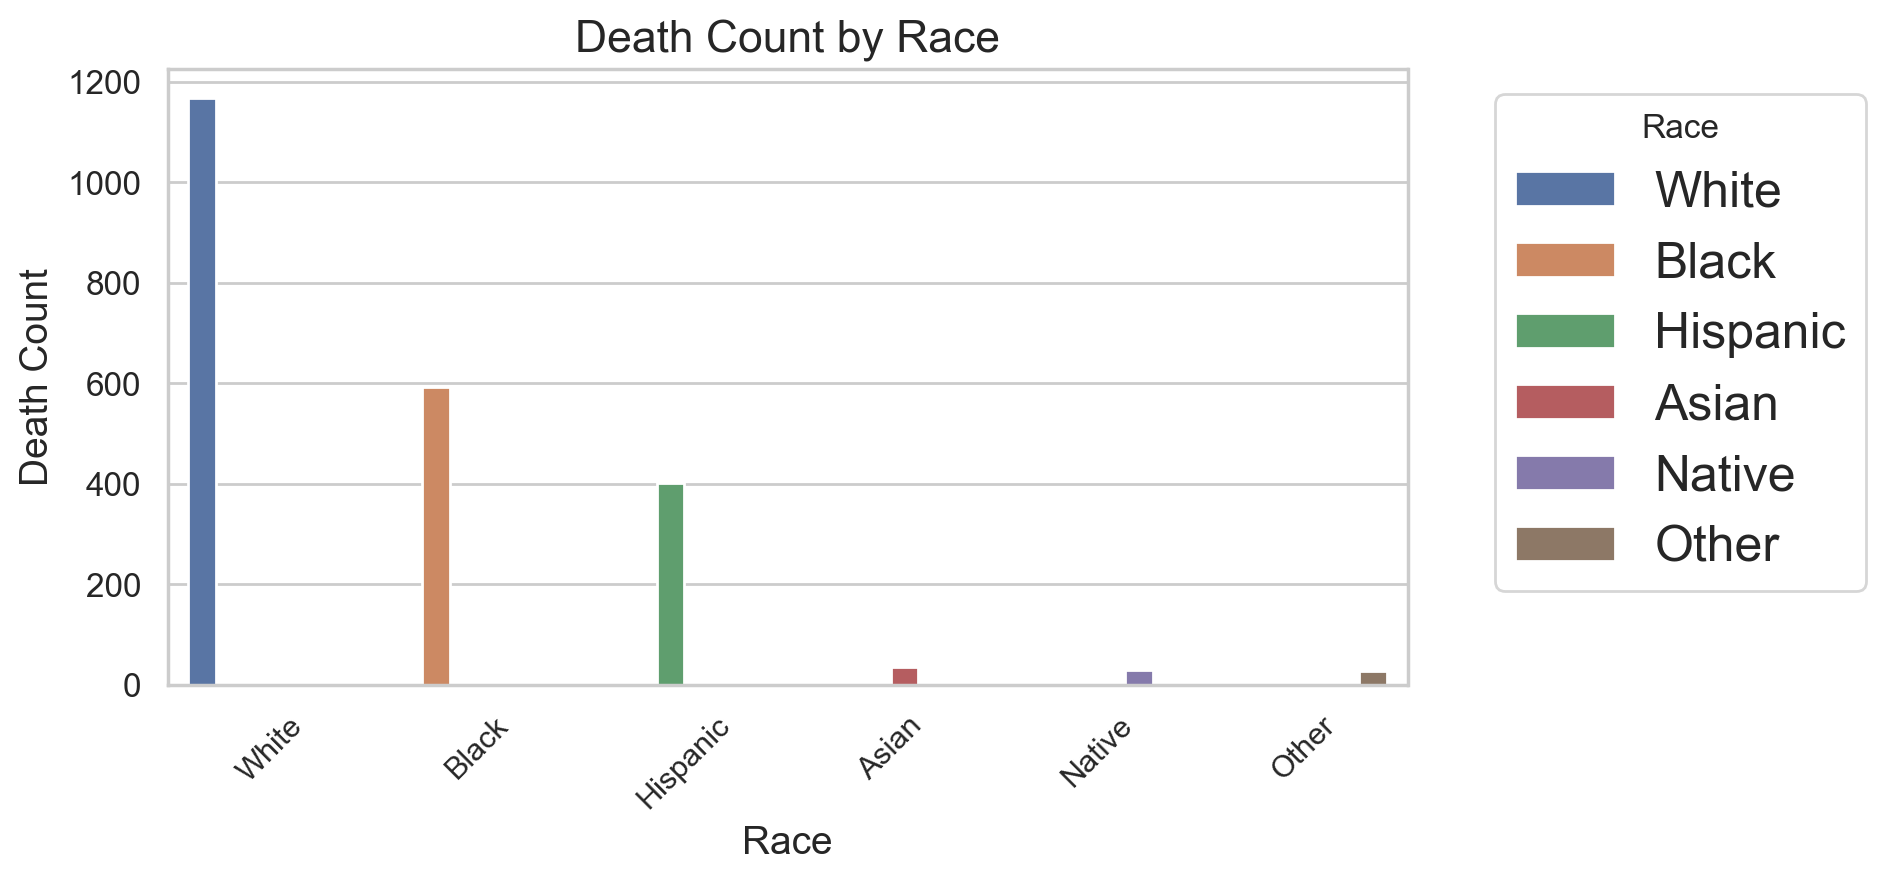

In [99]:
plt.figure(figsize=(8, 4), dpi=200)

sns.barplot(data=death_per_race, x="race", y="count", hue="race")
plt.title("Death Count by Race", fontsize=16)
plt.xlabel("Race", fontsize=14)
plt.ylabel("Death Count", fontsize=14)
plt.yticks(fontsize=12, ha='right')
plt.xticks(rotation=45)
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [50]:
df_fatalities["gender"] = df_fatalities["gender"].replace(["M", "F"], ["Male", "Female"])

In [51]:
deaths_by_gender = df_fatalities.gender.value_counts()

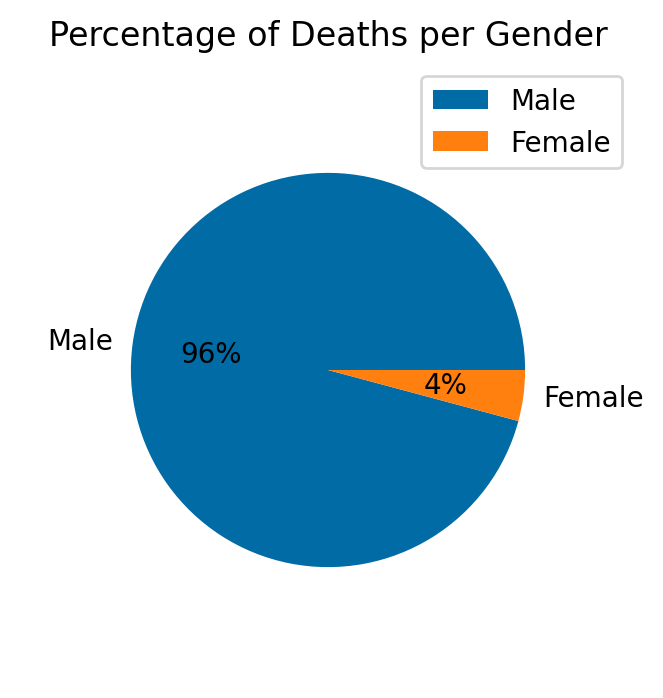

In [52]:
plt.figure(figsize=(4, 4), dpi=200)
plt.pie(deaths_by_gender, labels=deaths_by_gender.index, 
        autopct="%1.0f%%", 
        radius=0.8)
plt.title("Percentage of Deaths per Gender")
plt.legend()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

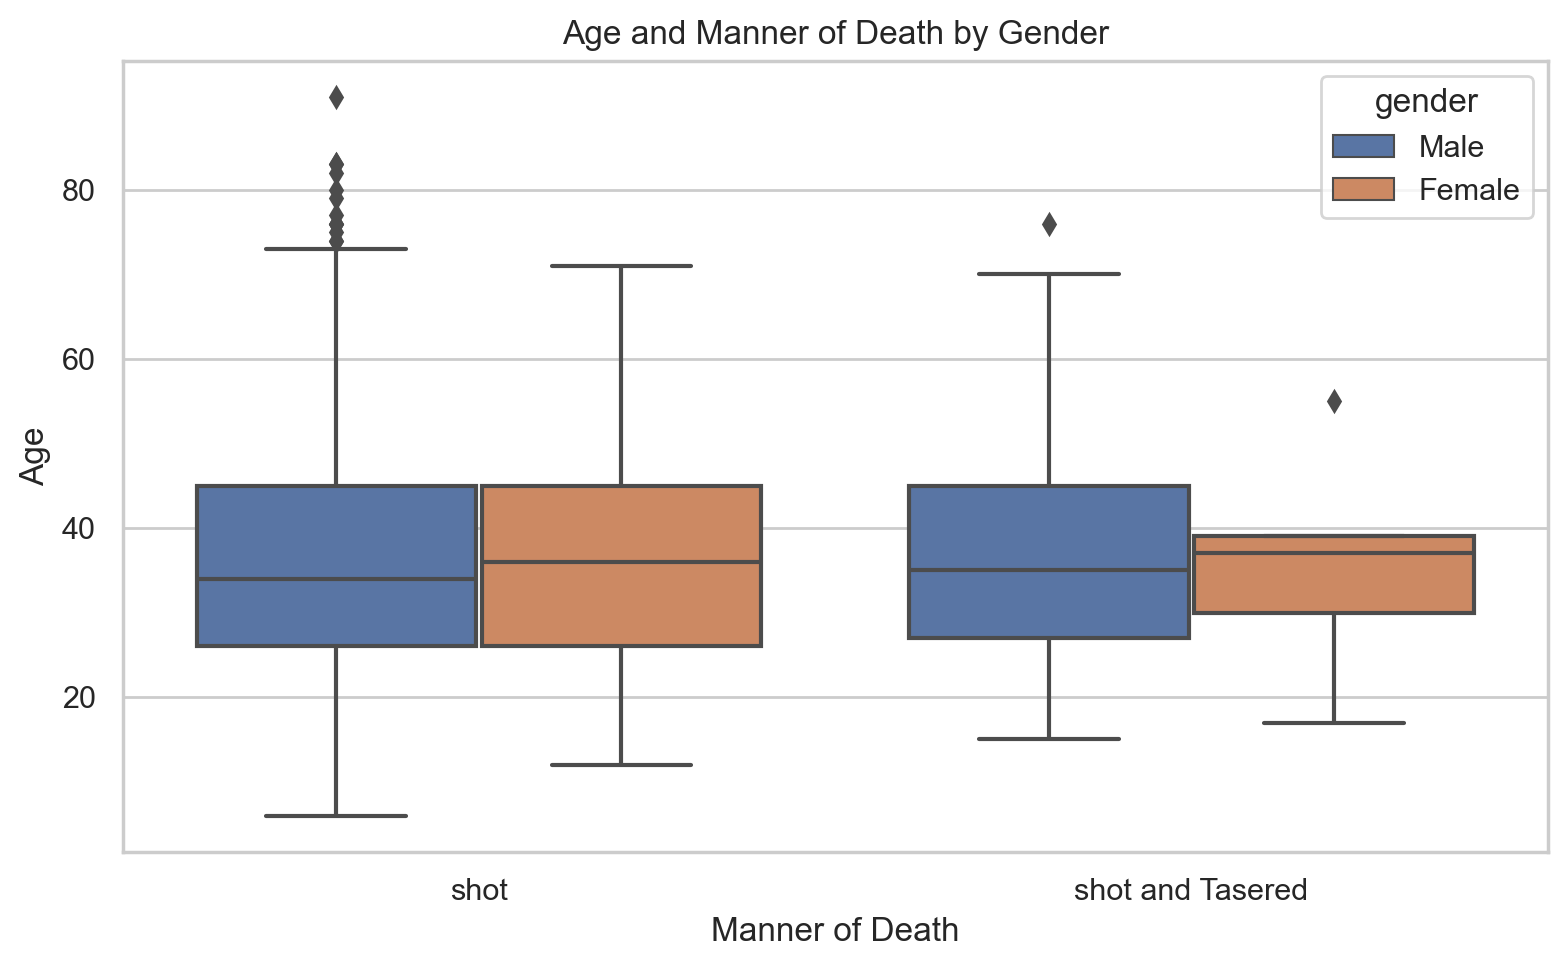

In [105]:
plt.figure(figsize=(8, 5), dpi=200)
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities)
plt.title('Age and Manner of Death by Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [54]:
type_armed = df_fatalities.armed.value_counts()

In [107]:
bar = px.bar(type_armed,
             x=type_armed.index[:15],
             y=type_armed.values[:15],
             color=type_armed.values[:15],
             height=700, width=1300,
             color_continuous_scale=px.colors.sequential.algae)

bar.update_layout(coloraxis_showscale=False,
                  xaxis_title='Type of Weapon', yaxis_title='Count of Deaths')
bar.show()

In [56]:
value_to_compare = 'unarmed'

In [57]:
sum_of_other_values = type_armed.drop(value_to_compare).sum()

In [58]:
count_of_unarmed = type_armed[value_to_compare]

In [59]:
sum_of_other_values

2089

In [60]:
percentage = (count_of_unarmed / (sum_of_other_values + count_of_unarmed)) * 100

In [61]:
print(f"The sum of the other 66 categories is: {sum_of_other_values}")
print(f"The count of the specified category ({value_to_compare}) is: {count_of_unarmed}")
print(f"The percentage of the specified category compared to the sum of the other 66 categories is: {percentage:.2f}%")

The sum of the other 66 categories is: 2089
The count of the specified category (unarmed) is: 165
The percentage of the specified category compared to the sum of the other 66 categories is: 7.32%


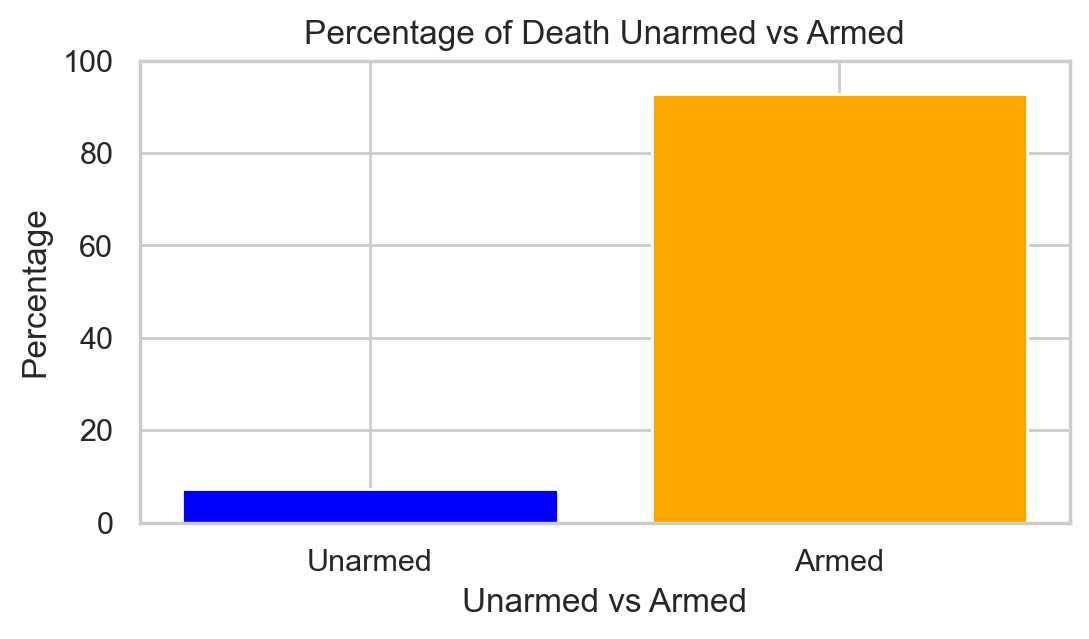

In [112]:
plt.figure(figsize=(6, 3), dpi=200)
plt.bar(['Unarmed', 'Armed'], [percentage, 100 - percentage], color=['blue', 'orange'])
plt.title('Percentage of Death Unarmed vs Armed')
plt.ylabel('Percentage')
plt.xlabel("Unarmed vs Armed")
plt.ylim(0, 100)
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [63]:
under_25_count = df_fatalities[df_fatalities['age'] < 25].shape[0]

In [64]:
total_count = df_fatalities.shape[0]

In [65]:
percentage_under_25 = (under_25_count / total_count) * 100

In [66]:
print(f"Percentage of people under 25: {percentage_under_25:.2f}%")

Percentage of people under 25: 18.72%


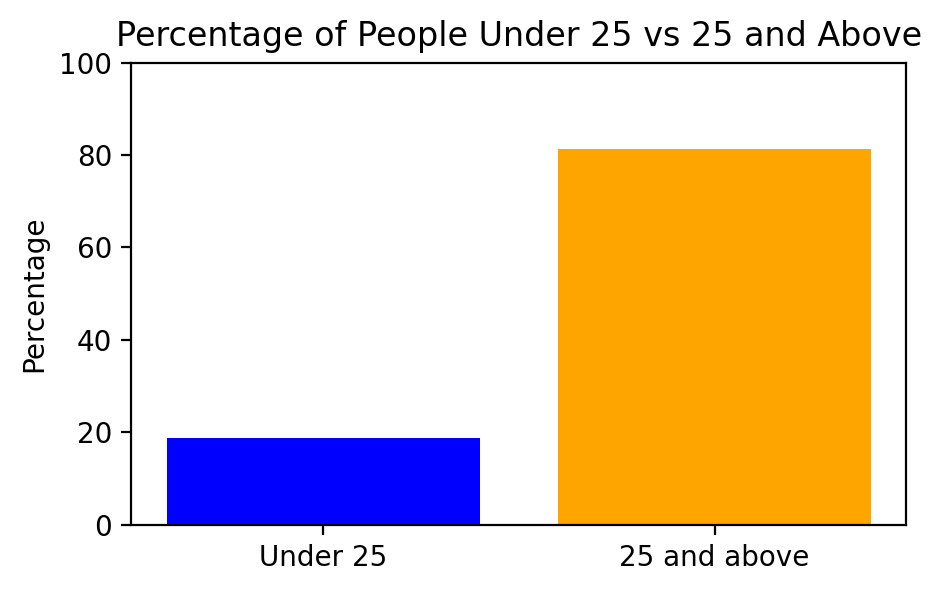

In [67]:
plt.figure(figsize=(5, 3), dpi=200)
plt.bar(['Under 25', '25 and above'], [percentage_under_25, 100 - percentage_under_25], color=['blue', 'orange'])
plt.title('Percentage of People Under 25 vs 25 and Above')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

/Users/milan91/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



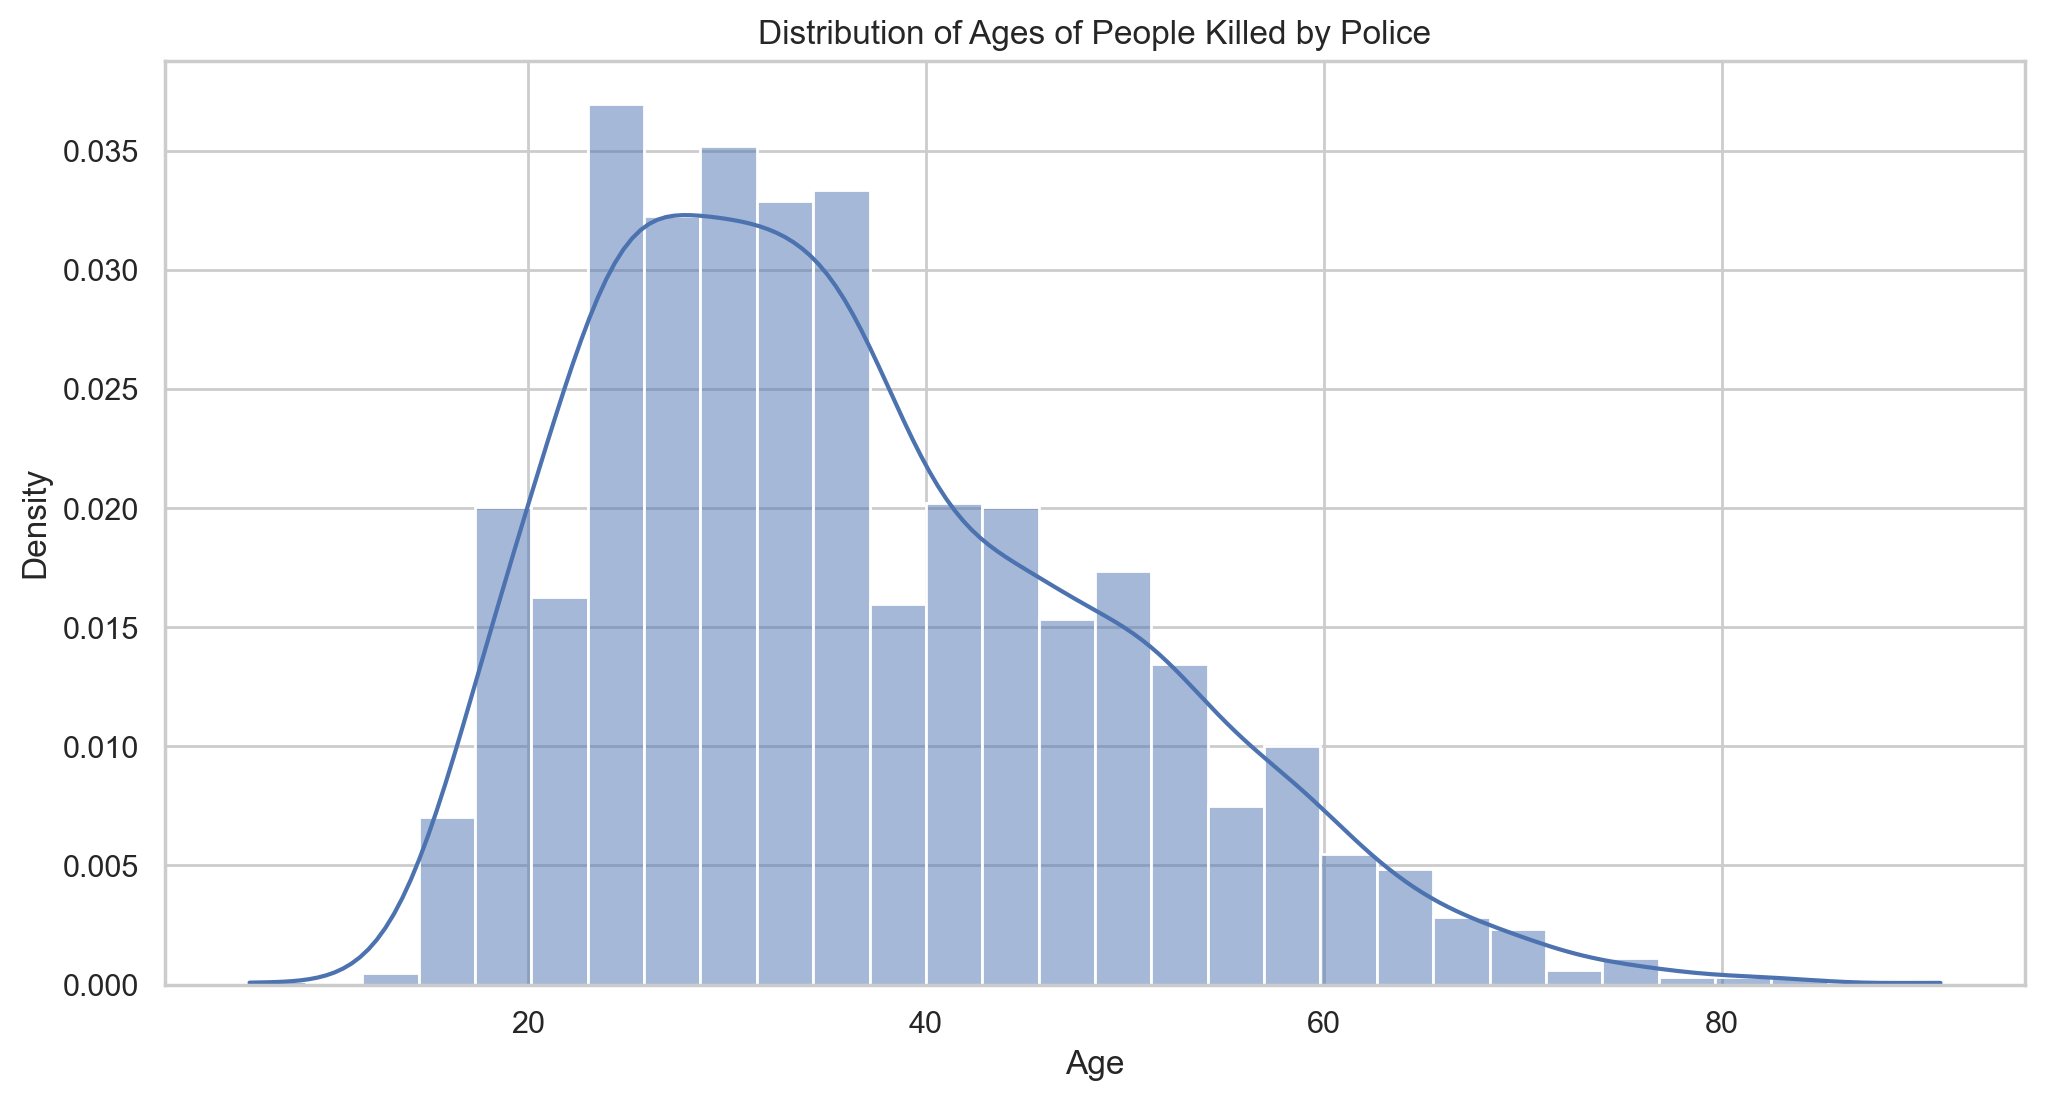

In [68]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df_fatalities, x='age', kde=True, stat='density', bins=30)
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

/Users/milan91/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



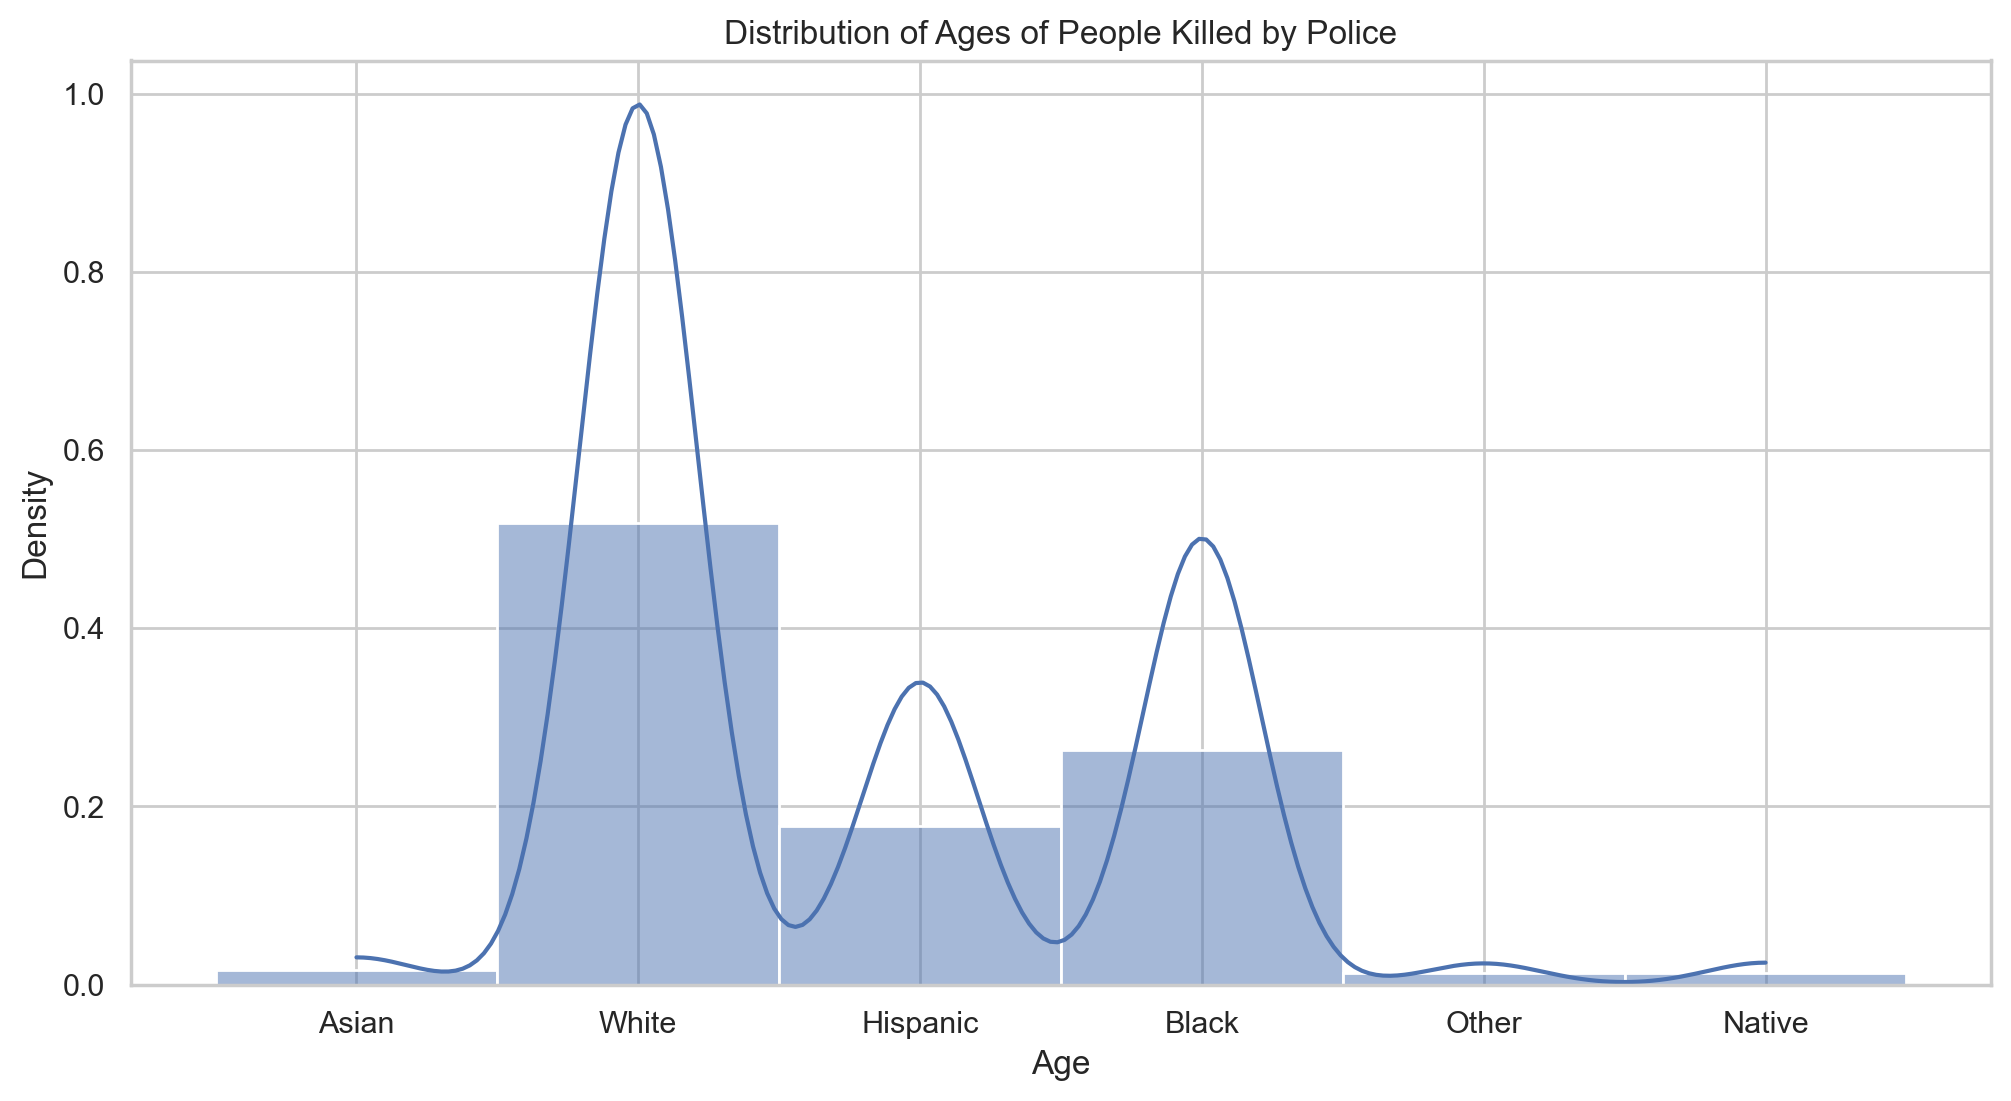

In [69]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df_fatalities, x='race', kde=True, stat='density', bins=30)
plt.title('Distribution of Ages of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [70]:
df_fatalities['signs_of_mental_illness'] = df_fatalities['signs_of_mental_illness'].map({True: 'With Illness', False: 'Without Illness'})

In [71]:
mental_illness = df_fatalities["signs_of_mental_illness"].value_counts()

In [72]:
mental_illness

signs_of_mental_illness
Without Illness    1681
With Illness        573
Name: count, dtype: int64

In [129]:
fig = px.bar(mental_illness, 
             x=mental_illness.index,
             y=mental_illness.values,
             title="Death of People With Mental Illness",
             color=mental_illness.index)

fig.update_layout(xaxis_title='Race', yaxis_title='Count of Deaths',
                  legend_title="Illness")
fig.update_traces(showlegend=True)

fig.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [74]:
top10_cities = df_fatalities.groupby("city").size()

In [75]:
top10_cities = top10_cities.sort_values(ascending=False)[:10]

In [113]:
bar = px.bar(top10_cities,
             x=top10_cities.index,
             y=top10_cities.values,
             color=top10_cities.values,
             color_continuous_scale=px.colors.sequential.Aggrnyl_r)

bar.update_layout(xaxis_title="Cities",
                  yaxis_title="Count of Deaths",
                  coloraxis_showscale=False,
                  height=600, width=1300)
bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [77]:
top10_cities_df = df_fatalities[df_fatalities["city"].isin(["Los Angeles", "Phoenix", "Houston", "Chicago", "Austin", "Las Vegas", "Columbus", "San Antonio", "Miami", "St. Louis"])]

In [78]:
race_counts = top10_cities_df.groupby(['city', 'race']).size().unstack(fill_value=0)

In [79]:
total_population_per_city = race_counts.sum(axis=1)

In [80]:
race_share_per_city = race_counts.divide(total_population_per_city, axis=0)

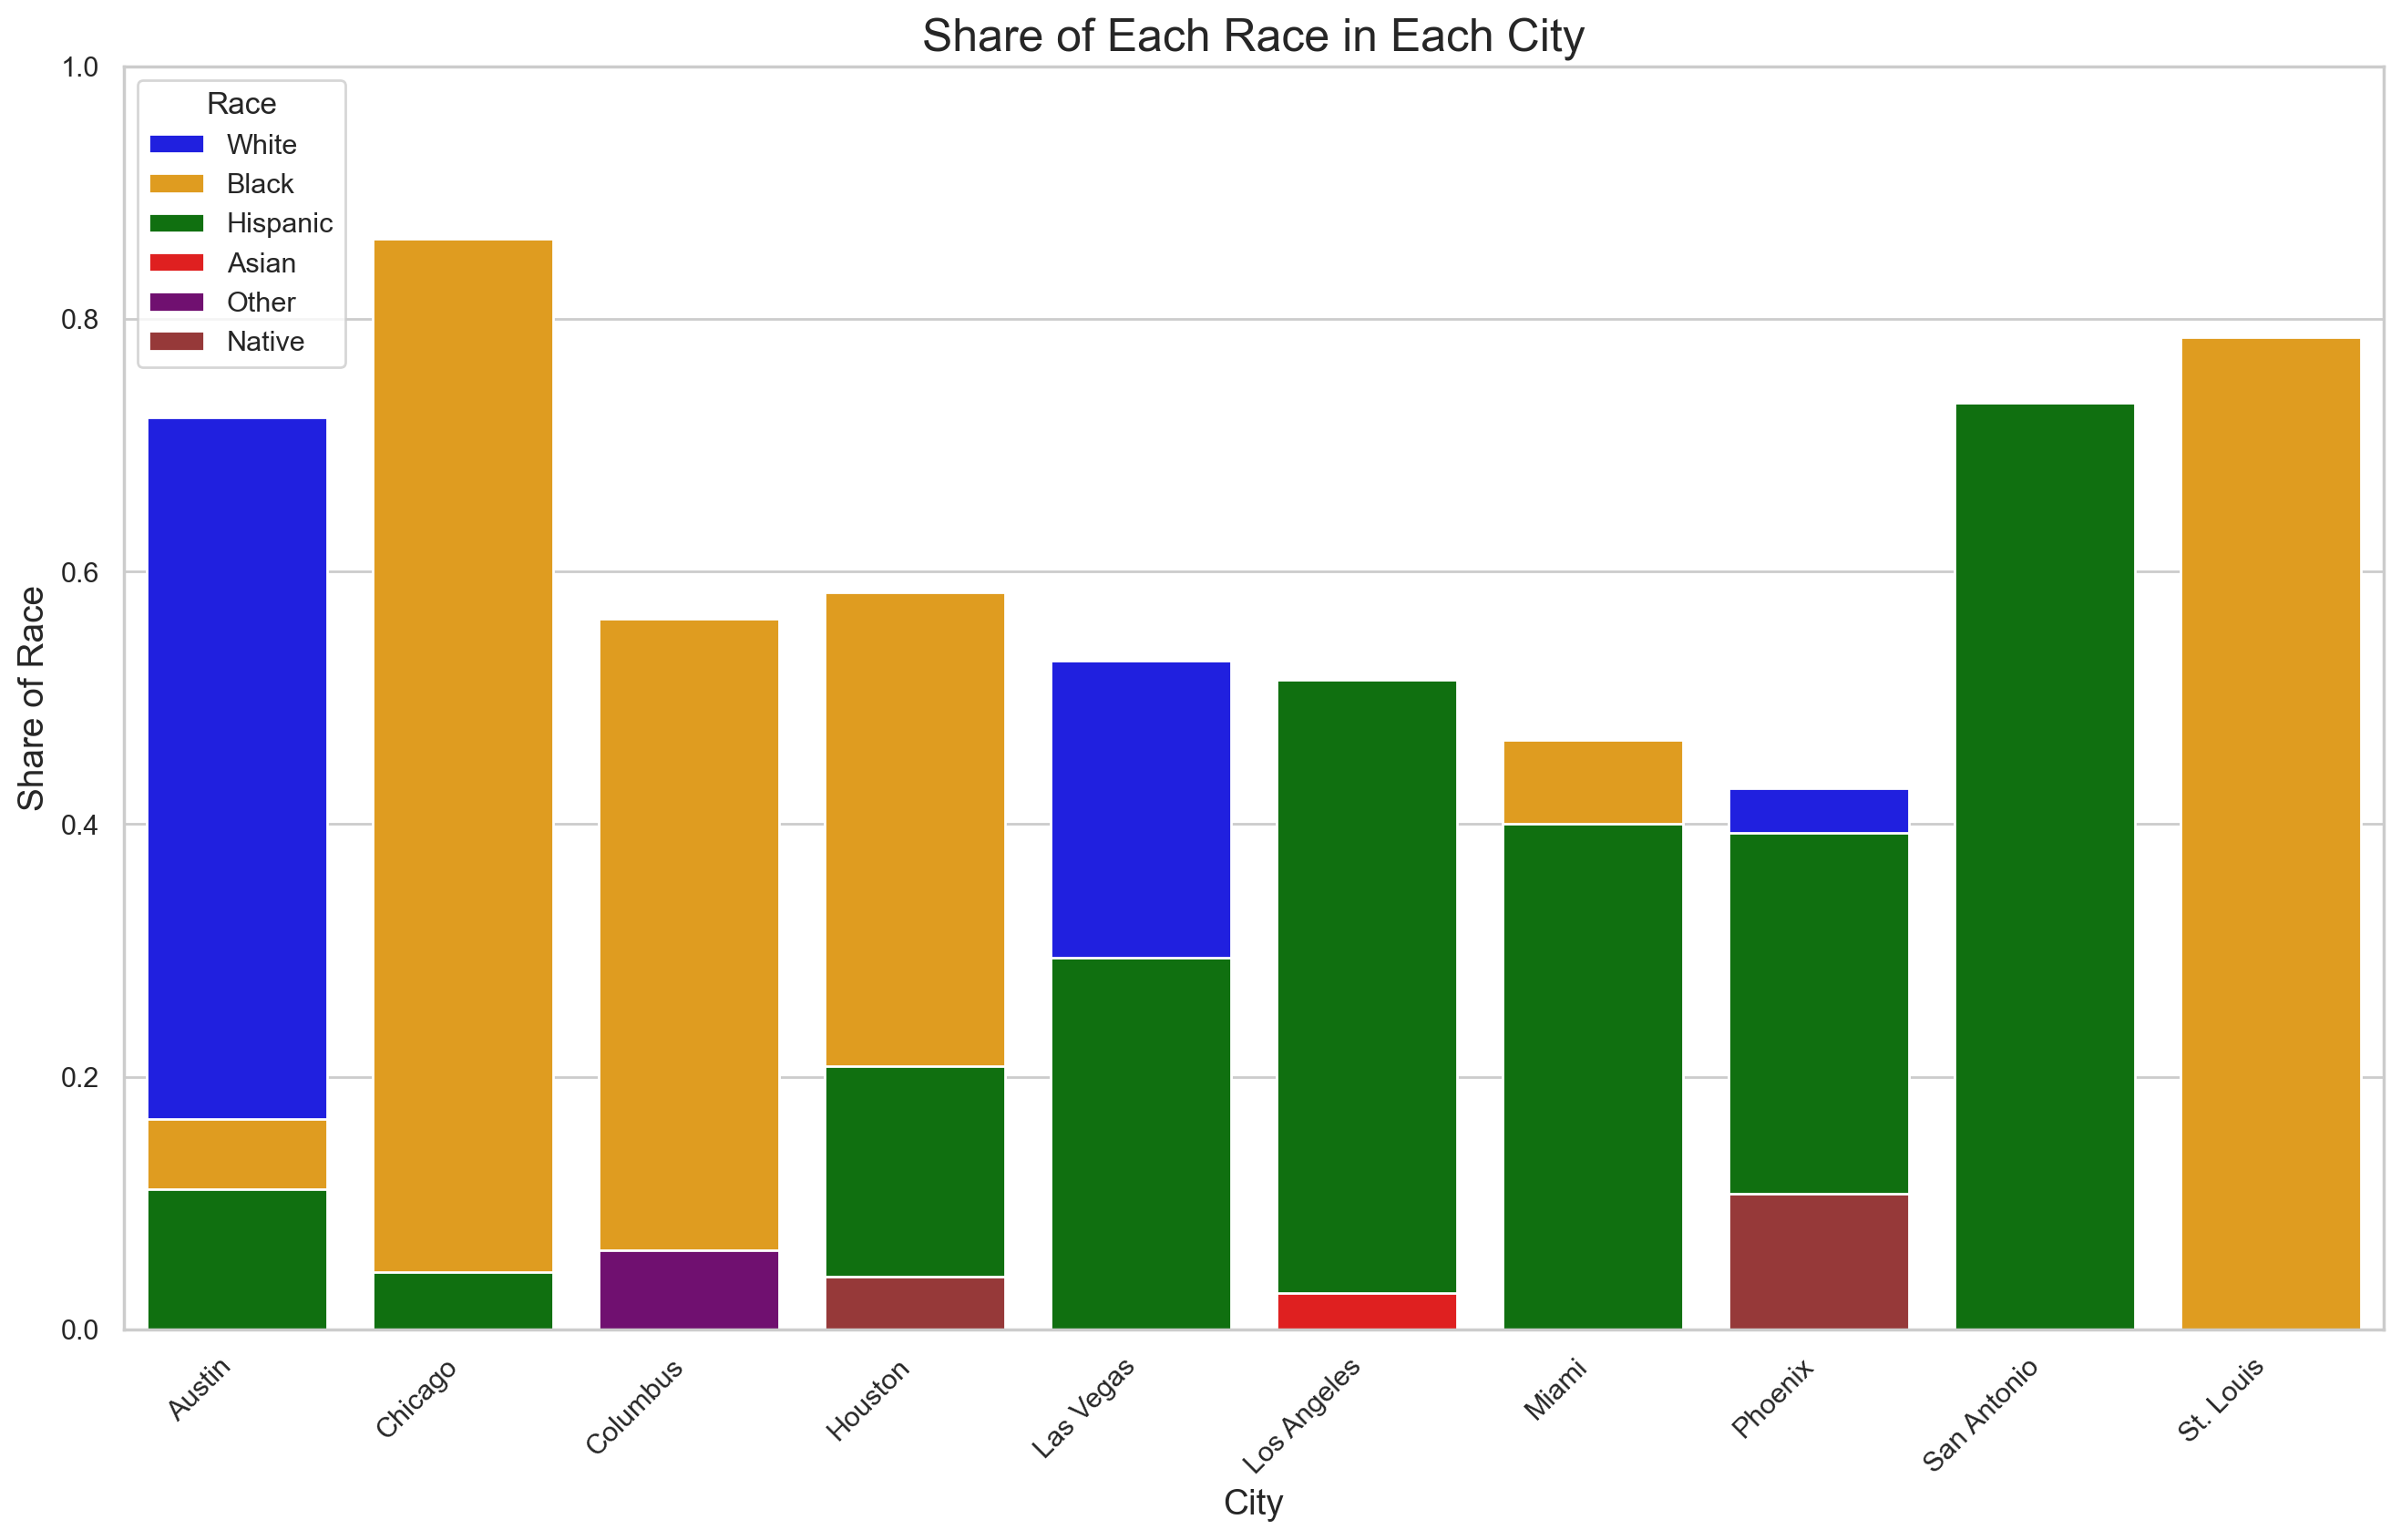

In [116]:
plt.figure(figsize=(16, 9), dpi=200)

sns.barplot(data=race_share_per_city.reset_index(), x='city', y='White', color='blue', label='White')
sns.barplot(data=race_share_per_city.reset_index(), x='city', y='Black', color='orange', label='Black')
sns.barplot(data=race_share_per_city.reset_index(), x='city', y='Hispanic', color='green', label='Hispanic')
sns.barplot(data=race_share_per_city.reset_index(), x='city', y='Asian', color='red', label='Asian')
sns.barplot(data=race_share_per_city.reset_index(), x='city', y='Other', color='purple', label='Other')
sns.barplot(data=race_share_per_city.reset_index(), x='city', y='Native', color='brown', label='Native')

plt.xlabel('City', fontsize=14)
plt.ylabel('Share of Race', fontsize=14)
plt.title('Share of Each Race in Each City', fontsize=18)

plt.legend(title='Race')
plt.ylim(0,1)
plt.xticks(rotation=45, ha='right')

#plt.tight_layout()
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [82]:
death_by_states = df_fatalities.groupby("state", as_index=False).agg({"id": pd.Series.count})

In [83]:
death_by_states.rename(columns={"id": 'Death Count'}, inplace=True)

In [84]:
world_map = px.choropleth(death_by_states,
                          locations='state',
                          locationmode="USA-states",
                          scope="usa",
                          color='Death Count',
                          hover_name="state",
                          color_continuous_scale=px.colors.sequential.algae)

world_map.update_layout(coloraxis_showscale=True,
                        margin=dict(l=30, r=30, t=30, b=30))

world_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [85]:
df_fatalities['Year'] = pd.to_datetime(df_fatalities['Year'], format='%Y')

In [86]:
deaths_over_time = df_fatalities.groupby("Year", as_index=False).agg({"id": pd.Series.count})

In [87]:
deaths_over_time.rename(columns={"id": 'Death Count'}, inplace=True)

In [121]:
deaths_over_time.head()

Year  Death Count
0 2015-01-01          947
1 2016-01-01          873
2 2017-01-01          434

/Users/milan91/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/milan91/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



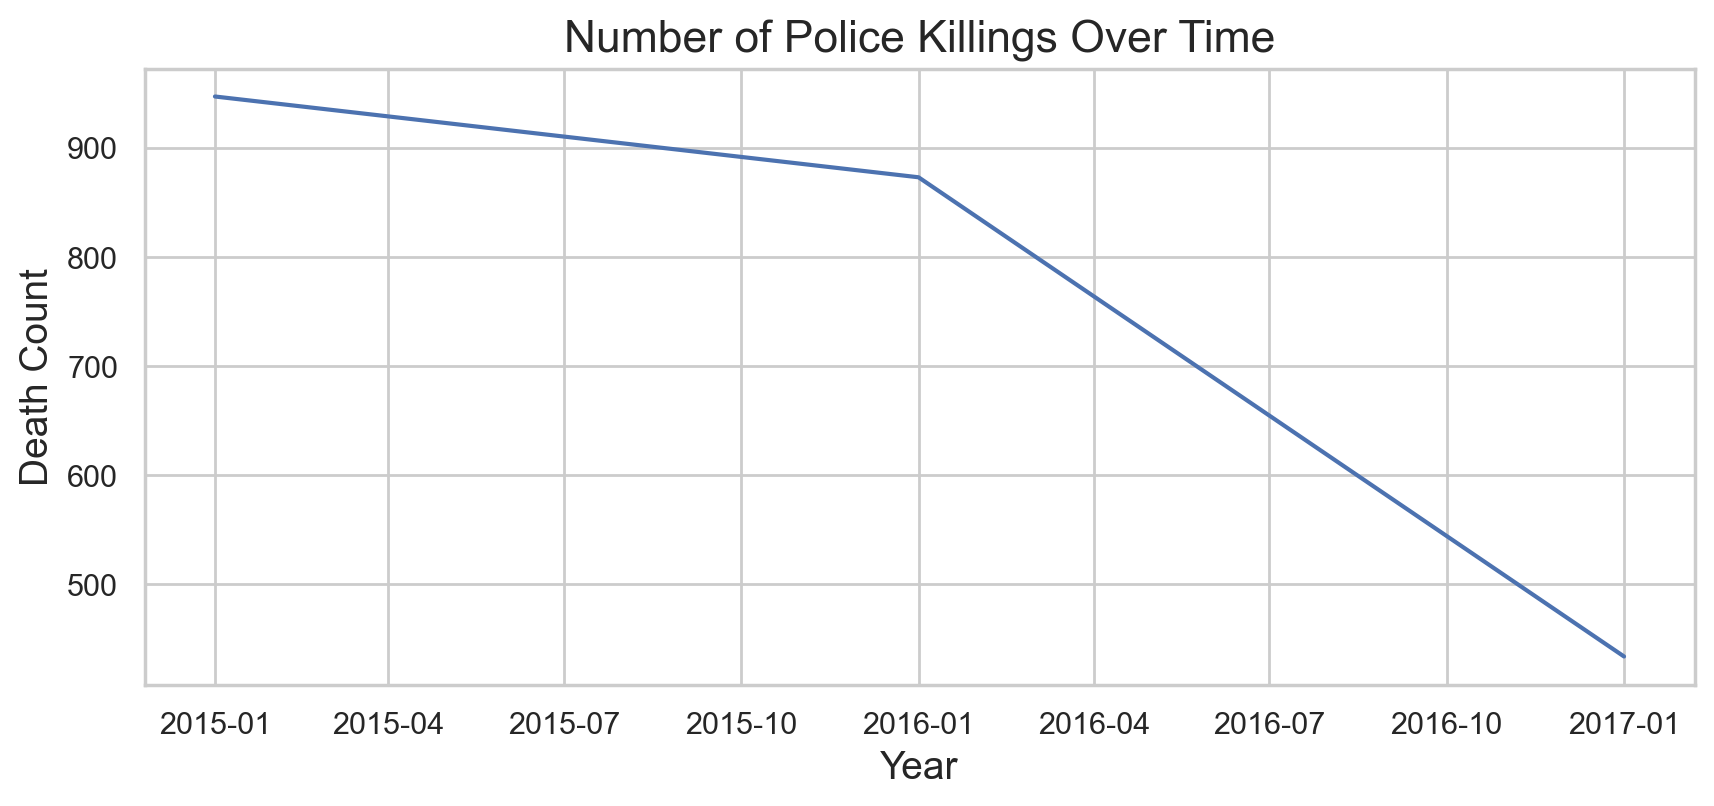

In [125]:
plt.figure(figsize=(10, 4), dpi=200)
sns.lineplot(data=deaths_over_time, x="Year", y="Death Count")

plt.title("Number of Police Killings Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Death Count", fontsize=14)

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).